<a href="https://colab.research.google.com/github/SwetaAgarwal30/CAR-PRICE-PREDICTION/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
df=pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Car_Name'])

In [ ]:
df=df.drop(['Selling_type', 'Transmission', 'Owner'],axis=1)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,...,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,2014,3.35,5.59,27000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Car_Name_800',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g',
       ...
       'Car_Name_land cruiser', 'Car_Name_omni', 'Car_Name_ritz',
       'Car_Name_s cross', 'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent'],
      dtype='object', length=105)

In [ ]:
df.isnull().sum()

Year                      0
Selling_Price             0
Present_Price             0
Driven_kms                0
Fuel_Type_CNG             0
                         ..
Car_Name_sx4              0
Car_Name_verna            0
Car_Name_vitara brezza    0
Car_Name_wagon r          0
Car_Name_xcent            0
Length: 105, dtype: int64

Text(0.5, 1.0, 'Year Vs Present_Price')

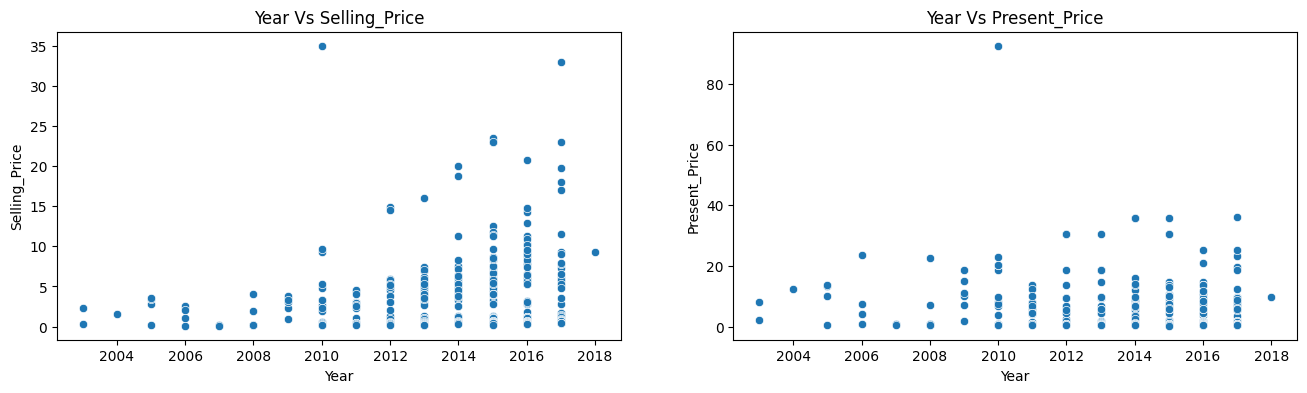

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Year'],y=df['Selling_Price'])
plt.title('Year Vs Selling_Price')
plt.subplot(1,2,2)
sns.scatterplot(x=df['Year'],y=df['Present_Price'])
plt.title('Year Vs Present_Price')

<Axes: title={'center': 'Correlation between present price and selling price '}, xlabel='Year', ylabel='Selling_Price'>

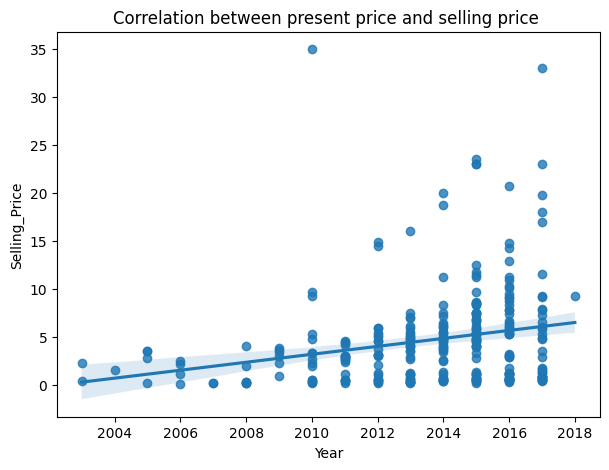

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Correlation between present price and selling price ")
sns.regplot(df,x=df['Year'],y=df['Selling_Price'])

In [ ]:
df['Price_Category'] = pd.cut(df['Selling_Price'], bins=[-float('inf'), 4, 6, float('inf')], labels=['low', 'medium', 'high'])

In [ ]:
X = df.drop(['Selling_Price', 'Price_Category'], axis=1)  # Exclude target variable
y = df['Price_Category']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape,X_test.shape

((240, 104), (61, 104))

In [ ]:
y_train.shape,y_test.shape

((240,), (61,))

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

        high       0.80      0.67      0.73        18
         low       1.00      0.91      0.95        33
      medium       0.50      0.80      0.62        10

    accuracy                           0.82        61
   macro avg       0.77      0.79      0.77        61
weighted avg       0.86      0.82      0.83        61



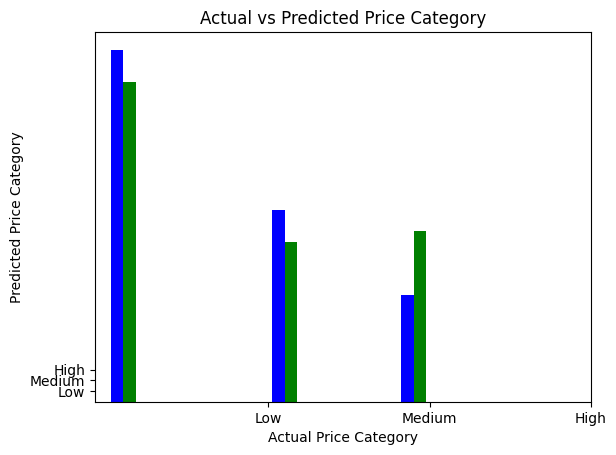

In [ ]:
plt.hist([y_test, y_pred],bins=10, color=['blue','green'])
plt.xlabel('Actual Price Category')
plt.ylabel('Predicted Price Category')
plt.title('Actual vs Predicted Price Category')
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.yticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.show()